#### Simulation: Different spatial patterns to understand behavior of TDA adjacency method

In [1]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
from geodata import generate_grid_dataframe,calculate_moran_i

from adjacency_simplex import AdjacencySimplex  # Import the class
from plot_utills import plot_simplicial_complex_gif
from calculate_tda_summaries import compute_persistence

In [3]:
NUM_OF_ITERATIONS = 50
GRID_SIZE = 7

# Set the random seed
np.random.seed(0)
RANDOM_SEED_LIST = np.random.randint(0, 1000, NUM_OF_ITERATIONS)

# create a empty df to store the results
results_df = pd.DataFrame(columns=['Iteration', 'Random Seed','Autocorrlation', 'Moran I', 'Filter Method', 'Number of H0 Points', 'TL', 'AL', 'TML', 'AML','Value'])


for iter in range(NUM_OF_ITERATIONS):
    print(f"Iteration: {iter}")
    RANDOM_SEED = RANDOM_SEED_LIST[iter]

    gdf_none = generate_grid_dataframe(GRID_SIZE, autocorrelation="none", random_seed=RANDOM_SEED)        # No spatial correlation
    gdf_positive = generate_grid_dataframe(GRID_SIZE, autocorrelation="positive", random_seed=RANDOM_SEED) 
    gdf_negative = generate_grid_dataframe(GRID_SIZE, autocorrelation="negative", random_seed=RANDOM_SEED)

    # Calculate Moran’s I
    moran_none = calculate_moran_i(gdf_none, GRID_SIZE)
    moran_positive = calculate_moran_i(gdf_positive, GRID_SIZE)
    moran_negative = calculate_moran_i(gdf_negative, GRID_SIZE)

    for gdf in [gdf_none, gdf_positive, gdf_negative]:
        for filter_method in ['up', 'down']:
        
            # Initialize the AdjacencySimplex class
            adj_simplex = AdjacencySimplex(gdf, 'Value', threshold = None, filter_method = filter_method)

            # Filter the GeoDataFrame
            filtered_df,gdf_id = adj_simplex.filter_sort_gdf()

            # Calculate the adjacent countries
            adj_simplex.calculate_adjacent_countries()

            # Form the simplicial complex
            simplex = adj_simplex.form_simplicial_complex()

            # sum of the Value variable
            sum_value = filtered_df['Value'].sum()


            total_h0_points, tl, al, tml, aml = compute_persistence(simplex,filtered_df, 'Value')

            if filter_method == 'up' and gdf is gdf_none:
                new_row = pd.DataFrame([{'Iteration': iter, 'Random Seed': RANDOM_SEED, 'Autocorrlation': 'none', 'Moran I': moran_none, 'Filter Method': filter_method, 'Number of H0 Points': total_h0_points, 'TL': tl, 'AL': al, 'TML': tml, 'AML': aml, 'Value': sum_value}])
                results_df = pd.concat([results_df, new_row], ignore_index=True)
            elif filter_method == 'up' and gdf is gdf_positive:
                new_row = pd.DataFrame([{'Iteration': iter, 'Random Seed': RANDOM_SEED, 'Autocorrlation': 'positive', 'Moran I': moran_positive, 'Filter Method': filter_method, 'Number of H0 Points': total_h0_points, 'TL': tl, 'AL': al, 'TML': tml, 'AML': aml, 'Value': sum_value}])
                results_df = pd.concat([results_df, new_row], ignore_index=True)
            elif filter_method == 'up' and gdf is gdf_negative:
                new_row = pd.DataFrame([{'Iteration': iter, 'Random Seed': RANDOM_SEED, 'Autocorrlation': 'negative', 'Moran I': moran_negative, 'Filter Method': filter_method, 'Number of H0 Points': total_h0_points, 'TL': tl, 'AL': al, 'TML': tml, 'AML': aml, 'Value': sum_value}])
                results_df = pd.concat([results_df, new_row], ignore_index=True)
            elif filter_method == 'down' and gdf is gdf_none:
                new_row = pd.DataFrame([{'Iteration': iter, 'Random Seed': RANDOM_SEED, 'Autocorrlation': 'none', 'Moran I': moran_none, 'Filter Method': filter_method, 'Number of H0 Points': total_h0_points, 'TL': tl, 'AL': al, 'TML': tml, 'AML': aml, 'Value': sum_value}])
                results_df = pd.concat([results_df, new_row], ignore_index=True)
            elif filter_method == 'down' and gdf is gdf_positive:
                new_row = pd.DataFrame([{'Iteration': iter, 'Random Seed': RANDOM_SEED, 'Autocorrlation': 'positive', 'Moran I': moran_positive, 'Filter Method': filter_method, 'Number of H0 Points': total_h0_points, 'TL': tl, 'AL': al, 'TML': tml, 'AML': aml, 'Value': sum_value}])
                results_df = pd.concat([results_df, new_row], ignore_index=True)
            elif filter_method == 'down' and gdf is gdf_negative:
                new_row = pd.DataFrame([{'Iteration': iter, 'Random Seed': RANDOM_SEED, 'Autocorrlation': 'negative', 'Moran I': moran_negative, 'Filter Method': filter_method, 'Number of H0 Points': total_h0_points, 'TL': tl, 'AL': al, 'TML': tml, 'AML': aml, 'Value': sum_value}])
                results_df = pd.concat([results_df, new_row], ignore_index=True)


Iteration: 0
Iteration: 1


/var/folders/j3/904q7dbj02j_jyjz7pvfgz384d40kw/T/ipykernel_44126/2769738947.py:48: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results_df = pd.concat([results_df, new_row], ignore_index=True)


Iteration: 2
Iteration: 3
Iteration: 4
Iteration: 5
Iteration: 6
Iteration: 7
Iteration: 8
Iteration: 9
Iteration: 10
Iteration: 11
Iteration: 12
Iteration: 13
Iteration: 14
Iteration: 15
Iteration: 16
Iteration: 17
Iteration: 18
Iteration: 19
Iteration: 20
Iteration: 21
Iteration: 22
Iteration: 23
Iteration: 24
Iteration: 25
Iteration: 26
Iteration: 27
Iteration: 28
Iteration: 29
Iteration: 30
Iteration: 31
Iteration: 32
Iteration: 33
Iteration: 34
Iteration: 35
Iteration: 36
Iteration: 37
Iteration: 38
Iteration: 39
Iteration: 40
Iteration: 41
Iteration: 42
Iteration: 43
Iteration: 44
Iteration: 45
Iteration: 46
Iteration: 47
Iteration: 48
Iteration: 49


In [4]:
results_df.head()

,Iteration,Random Seed,Autocorrlation,Moran I,Filter Method,Number of H0 Points,TL,AL,TML,AML,Value
0,0,684,none,-0.195978,up,49,783.000000,15.979592,391.500000,7.989796,735
1,0,684,none,-0.195978,down,49,411.000000,8.387755,205.500000,4.193878,735
2,0,684,positive,0.602332,up,49,689.000000,14.061224,344.500000,7.030612,687
3,0,684,positive,0.602332,down,49,673.000000,13.734694,336.500000,6.867347,687
4,0,684,negative,-0.740493,up,49,25.558158,0.521595,12.779079,0.260798,24.628854


In [5]:
# create a empty df to store the results
test_df = pd.DataFrame(columns=['Iteration', 'Filter Method', 'TL Positive AC', 'TML Positive AC', 'TL none AC', 'TML none AC', 'Value'])

for ite in range(NUM_OF_ITERATIONS):
    temp_df_up = results_df[(results_df['Iteration'] == ite) & (results_df['Filter Method'] == 'up')]

    value = temp_df_up['Value'].values[0]

    temp_df_up_positive = temp_df_up[temp_df_up['Autocorrlation'] == 'positive']
    temp_df_up_none = temp_df_up[temp_df_up['Autocorrlation'] == 'none']

    TL_positive_AC_up = temp_df_up_positive['TL'].values[0]
    TML_positive_AC_up = temp_df_up_positive['TML'].values[0]
    TL_none_AC_up = temp_df_up_none['TL'].values[0]
    TML_none_AC_up = temp_df_up_none['TML'].values[0]



    temp_df_down = results_df[(results_df['Iteration'] == ite) & (results_df['Filter Method'] == 'down')]
    temp_df_down_positive = temp_df_down[temp_df_down['Autocorrlation'] == 'positive']
    temp_df_down_none = temp_df_down[temp_df_down['Autocorrlation'] == 'none']

    TL_positive_AC_down = temp_df_down_positive['TL'].values[0]
    TML_positive_AC_down = temp_df_down_positive['TML'].values[0]
    TL_none_AC_down = temp_df_down_none['TL'].values[0]
    TML_none_AC_down = temp_df_down_none['TML'].values[0]

    new_row = pd.DataFrame([{'Iteration': ite, 'Filter Method': 'up', 'TL Positive AC': TL_positive_AC_up, 'TML Positive AC': TML_positive_AC_up, 'TL none AC': TL_none_AC_up, 'TML none AC': TML_none_AC_up, 'Value': value}])

    test_df = pd.concat([test_df, new_row], ignore_index=True)

    new_row = pd.DataFrame([{'Iteration': ite, 'Filter Method': 'down', 'TL Positive AC': TL_positive_AC_down, 'TML Positive AC': TML_positive_AC_down, 'TL none AC': TL_none_AC_down, 'TML none AC': TML_none_AC_down, 'Value': value}])

    test_df = pd.concat([test_df, new_row], ignore_index=True)

/var/folders/j3/904q7dbj02j_jyjz7pvfgz384d40kw/T/ipykernel_44126/1296442910.py:30: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  test_df = pd.concat([test_df, new_row], ignore_index=True)


In [6]:
test_df

,Iteration,Filter Method,TL Positive AC,TML Positive AC,TL none AC,TML none AC,Value
0,0,up,689.0,344.5,783.0,391.5,735
1,0,down,673.0,336.5,411.0,205.5,735
2,1,up,765.0,382.5,853.0,426.5,804
3,1,down,730.0,365.0,544.0,272.0,804
4,2,up,699.0,349.5,797.0,398.5,743
...,...,...,...,...,...,...,...
95,47,down,725.0,362.5,461.0,230.5,809
96,48,up,767.0,383.5,848.0,424.0,809
97,48,down,736.0,368.0,508.0,254.0,809
98,49,up,796.0,398.0,888.0,444.0,838


In [7]:
# filter by filter method
temp_df_up = test_df[test_df['Filter Method'] == 'up']
temp_df_down = test_df[test_df['Filter Method'] == 'down']

temp_df_down = temp_df_down[temp_df_down['Iteration'].isin([0,1,2,3,4,5,6,7,8,9])]
temp_df_up = temp_df_up[temp_df_up['Iteration'].isin([0,1,2,3,4,5,6,7,8,9])]

Filtering up: 

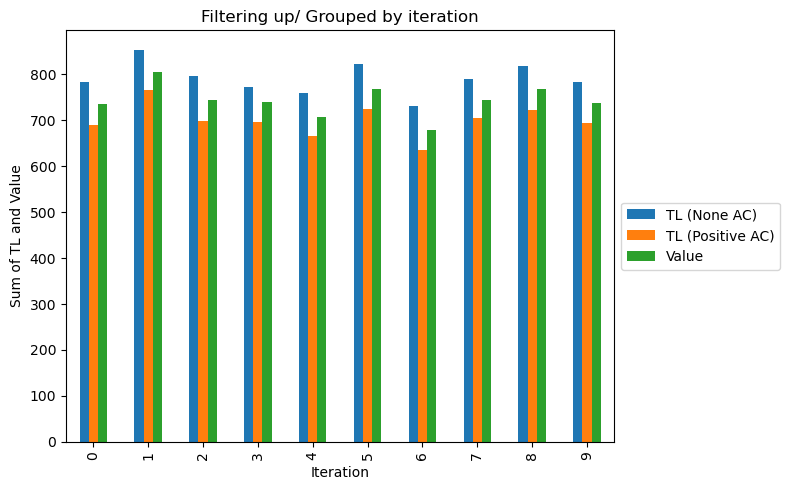

In [13]:
import matplotlib.pyplot as plt

# Create the bar chart
ax = temp_df_up.groupby('Iteration')[['TL none AC','TL Positive AC', 'Value']].sum().plot(
    kind='bar',
    figsize=(8, 5)
)

# Label axes and add a title
plt.xlabel("Iteration")
plt.ylabel("Sum of TL and Value")
plt.title("Filtering up/ Grouped by iteration")

# Get handles & labels once
handles, labels = ax.get_legend_handles_labels()

# Provide custom labels in the same order as the columns
new_labels = ['TL (None AC)', 'TL (Positive AC)', 'Value']

# Set legend with new labels and desired position
# Here, 'center left' with bbox_to_anchor=(1, 0.5) places the legend
# outside the plot to the right, vertically centered
ax.legend(handles, new_labels, loc='center left', bbox_to_anchor=(1, 0.5))

plt.tight_layout()
plt.show()

Filtering Down:

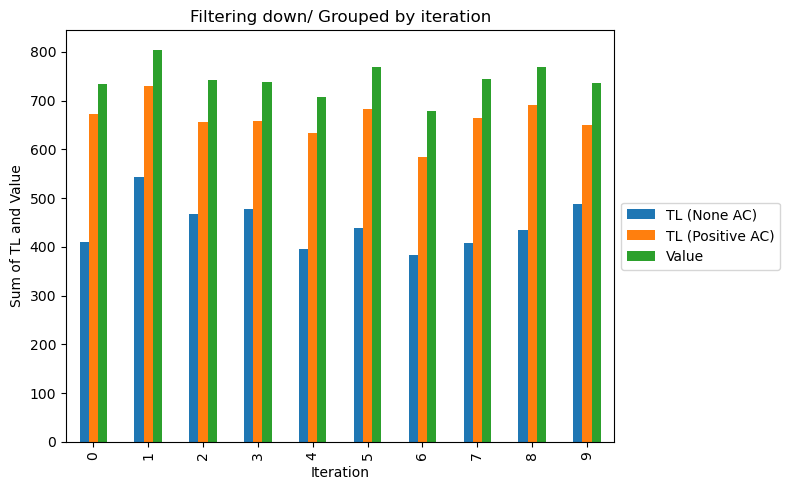

In [12]:
import matplotlib.pyplot as plt

# Create the bar chart
ax = temp_df_down.groupby('Iteration')[['TL none AC','TL Positive AC', 'Value']].sum().plot(
    kind='bar',
    figsize=(8, 5)
)

# Label axes and add a title
plt.xlabel("Iteration")
plt.ylabel("Sum of TL and Value")
plt.title("Filtering down/ Grouped by iteration")

# Get handles & labels once
handles, labels = ax.get_legend_handles_labels()

# Provide custom labels in the same order as the columns
new_labels = ['TL (None AC)', 'TL (Positive AC)', 'Value']

# Set legend with new labels and desired position
# Here, 'center left' with bbox_to_anchor=(1, 0.5) places the legend
# outside the plot to the right, vertically centered
ax.legend(handles, new_labels, loc='center left', bbox_to_anchor=(1, 0.5))

plt.tight_layout()
plt.show()